In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading file

ds = pd.read_csv('train_news.csv')

In [3]:
# Looking top data of train file
ds.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [4]:
# Looking shape of train file
ds.shape

(20800, 6)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [6]:
# Let's drop Unnamed: 0 from dataset.
ds.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [7]:
# checking any missing data in file.
ds.isnull().sum()

headline       558
written_by    1957
news            39
label            0
dtype: int64

#### Observations:
    
    1) There were few missing values in column 'headline','written_by' and'news'

In [8]:
# Treating missing values
# 1. Headline: Replacing with 'No Headline'
ds['headline'].fillna('No Headline',inplace=True)

# 2. written_by
ds['written_by'].fillna('No Author',inplace=True)

# news: i will drop these rows
ds.dropna(subset=['news'],inplace=True)

In [9]:
# rechecking the missing values, if any
ds.isnull().sum()

headline      0
written_by    0
news          0
label         0
dtype: int64

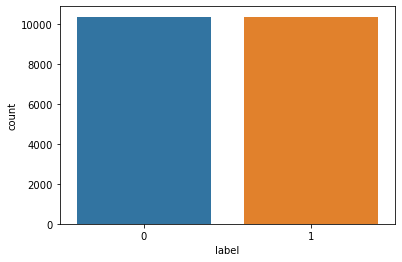

In [10]:
# Let's see how our Target column is distributed
sns.countplot('label',data=ds)
plt.show()

In [11]:
# Ratio
print ('Fake = ', round(len(ds[ds['label']==1]) / len(ds.label),2)*100,'%')
print ('Not Fake  = ', round(len(ds[ds['label']==0]) / len(ds.label),2)*100,'%')

Fake =  50.0 %
Not Fake  =  50.0 %


In [12]:
# New columns for headline, author and news of message and subject
ds['length_headline'] = ds.headline.str.len()
ds['length_written_by'] = ds.written_by.str.len()
ds['length_news'] = ds.news.str.len()
ds.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0,84,26,7936
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0,72,15,6112
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0,100,7,425
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0,100,12,6516
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1,28,17,9164


In [13]:
# Checking how many distinct writers are there
ds['written_by'].value_counts()

No Author                                     1939
Pam Key                                        243
admin                                          193
Jerome Hudson                                  166
Charlie Spiering                               141
                                              ... 
Karen Workman and Merrill D. Oliver              1
Michael S. Schmidt and Eric Lichtblau            1
Jim Rutenberg, Emily Steel and John Koblin       1
Joe Wolverton                                    1
Ellen Barry and Maher Sattar                     1
Name: written_by, Length: 4201, dtype: int64

In [14]:
# Pre Processing on Text Data
cols = ['headline','written_by','news']

for i in cols:
    ds[i] = ds[i].str.lower()

In [15]:
for j in cols:
    # Replace email addresses with 'email'
    ds[j] = ds[j].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    ds[j] = ds[j].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    ds[j] = ds[j].str.replace(r'£|\$', 'dollers')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    ds[j] = ds[j].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumber')


    # Replace numbers with 'numbr'
    ds[j] = ds[j].str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    ds[j] = ds[j].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    ds[j] = ds[j].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    ds[j] = ds[j].str.replace(r'^\s+|\s+?$', '')

In [16]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

# 'headline','written_by','news'

for k in cols:
    ds[k] = ds[k].apply(lambda x: ' '.join(    term for term in x.split() if term not in stop_words))

In [17]:
from nltk.tokenize import RegexpTokenizer

tokenizer=RegexpTokenizer(r'\w+')

for l in cols:
    ds[l] = ds[l].apply(lambda x: tokenizer.tokenize(x.lower()))
ds.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news
0,"[ethics, questions, dogged, agriculture, nomin...","[eric, lipton, steve, eder]","[washington, sonny, perdue, telling, georgians...",0,84,26,7936
1,"[must, dig, deep, stop, argentina, lionel, mes...","[david, waldstein]","[houston, venezuela, plan, tactical, approach,...",0,72,15,6112
2,"[cotton, house, walk, plank, vote, bill, canno...","[pam, key]","[sunday, abc, week, discussing, republican, pl...",0,100,7,425
3,"[paul, lepage, besieged, maine, governor, send...","[jess, bidgood]","[augusta, beleaguered, republican, governor, m...",0,100,12,6516
4,"[digital, numbr, numbr, trump, wins]","[finian, cunningham]","[finian, cunningham, written, extensively, int...",1,28,17,9164


In [18]:
# writing function for the entire dataset
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters

from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [19]:
# Processing Headline with above Function
processed_headline = []

for doc in ds.headline:
    processed_headline.append(preprocess(doc))
    
print(len(processed_headline))
processed_headline[:2]

20761


[['ethic',
  'question',
  'dog',
  'agricultur',
  'nomine',
  'georgia',
  'governor',
  'new',
  'york',
  'time'],
 ['must',
  'dig',
  'deep',
  'stop',
  'argentina',
  'lionel',
  'messi',
  'new',
  'york',
  'time']]

In [20]:
# Processing Author with above Function
processed_written_by = []

for doc in ds.written_by:
    processed_written_by.append(preprocess(doc))
    
print(len(processed_written_by))
processed_written_by[:3]

20761


[['eric', 'lipton', 'steve', 'eder'], ['david', 'waldstein'], ['pam', 'key']]

In [21]:
# Processing news with above Function
processed_news = []

for doc in ds.news:
    processed_news.append(preprocess(doc))
    
print(len(processed_news))
processed_news[:2]

20761


[['washington',
  'sonni',
  'perdu',
  'tell',
  'georgian',
  'grow',
  'weari',
  'corrupt',
  'scandal',
  'state',
  'take',
  'governor',
  'numbr',
  'time',
  'give',
  'version',
  'drain',
  'swamp',
  'pledg',
  'first',
  'goal',
  'governor',
  'restor',
  'public',
  'trust',
  'state',
  'govern',
  'chang',
  'cultur',
  'state',
  'govern',
  'perdu',
  'tell',
  'leadership',
  'confer',
  'kennesaw',
  'state',
  'univers',
  'april',
  'numbr',
  'form',
  'govern',
  'depend',
  'mutual',
  'bond',
  'trust',
  'peopl',
  'govern',
  'peopl',
  'becom',
  'cynic',
  'govern',
  'perdu',
  'republican',
  'await',
  'confirm',
  'serv',
  'presid',
  'trump',
  'agricultur',
  'secretari',
  'becom',
  'target',
  'frequent',
  'critic',
  'fail',
  'honor',
  'ethic',
  'pledg',
  'eight',
  'year',
  'governor',
  'critic',
  'center',
  'fact',
  'trump',
  'continu',
  'help',
  'run',
  'famili',
  'busi',
  'ventur',
  'four',
  'compani',
  'serv',
  'governo

In [22]:
ds['clean_headline']=processed_headline
ds['clean_news']=processed_news

# I'm not Processing Authors name, because they are names of people. They will be used directly from 'written_by' column

In [23]:
ds.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news,clean_headline,clean_news
0,"[ethics, questions, dogged, agriculture, nomin...","[eric, lipton, steve, eder]","[washington, sonny, perdue, telling, georgians...",0,84,26,7936,"[ethic, question, dog, agricultur, nomine, geo...","[washington, sonni, perdu, tell, georgian, gro..."
1,"[must, dig, deep, stop, argentina, lionel, mes...","[david, waldstein]","[houston, venezuela, plan, tactical, approach,...",0,72,15,6112,"[must, dig, deep, stop, argentina, lionel, mes...","[houston, venezuela, plan, tactic, approach, d..."
2,"[cotton, house, walk, plank, vote, bill, canno...","[pam, key]","[sunday, abc, week, discussing, republican, pl...",0,100,7,425,"[cotton, hous, walk, plank, vote, bill, cannot...","[sunday, abc, week, discuss, republican, plan,..."
3,"[paul, lepage, besieged, maine, governor, send...","[jess, bidgood]","[augusta, beleaguered, republican, governor, m...",0,100,12,6516,"[paul, lepag, besieg, main, governor, send, co...","[augusta, beleagu, republican, governor, main,..."
4,"[digital, numbr, numbr, trump, wins]","[finian, cunningham]","[finian, cunningham, written, extensively, int...",1,28,17,9164,"[digit, numbr, numbr, trump, win]","[finian, cunningham, write, extens, intern, af..."


In [24]:
for m in cols:
    ds[m] = ds[m].apply(lambda x:' '.join(y for y in x))
ds['clean_length_headline']=ds.headline.str.len()
ds['clean_length_news']=ds.news.str.len()

ds.head()

,headline,written_by,news,label,length_headline,length_written_by,length_news,clean_headline,clean_news,clean_length_headline,clean_length_news
0,ethics questions dogged agriculture nominee ge...,eric lipton steve eder,washington sonny perdue telling georgians grow...,0,84,26,7936,"[ethic, question, dog, agricultur, nomine, geo...","[washington, sonni, perdu, tell, georgian, gro...",75,5525
1,must dig deep stop argentina lionel messi new ...,david waldstein,houston venezuela plan tactical approach desig...,0,72,15,6112,"[must, dig, deep, stop, argentina, lionel, mes...","[houston, venezuela, plan, tactic, approach, d...",56,4163
2,cotton house walk plank vote bill cannot pass ...,pam key,sunday abc week discussing republican plan rep...,0,100,7,425,"[cotton, hous, walk, plank, vote, bill, cannot...","[sunday, abc, week, discuss, republican, plan,...",62,269
3,paul lepage besieged maine governor sends conf...,jess bidgood,augusta beleaguered republican governor maine ...,0,100,12,6516,"[paul, lepag, besieg, main, governor, send, co...","[augusta, beleagu, republican, governor, main,...",87,4412
4,digital numbr numbr trump wins,finian cunningham,finian cunningham written extensively internat...,1,28,17,9164,"[digit, numbr, numbr, trump, win]","[finian, cunningham, write, extens, intern, af...",30,6726


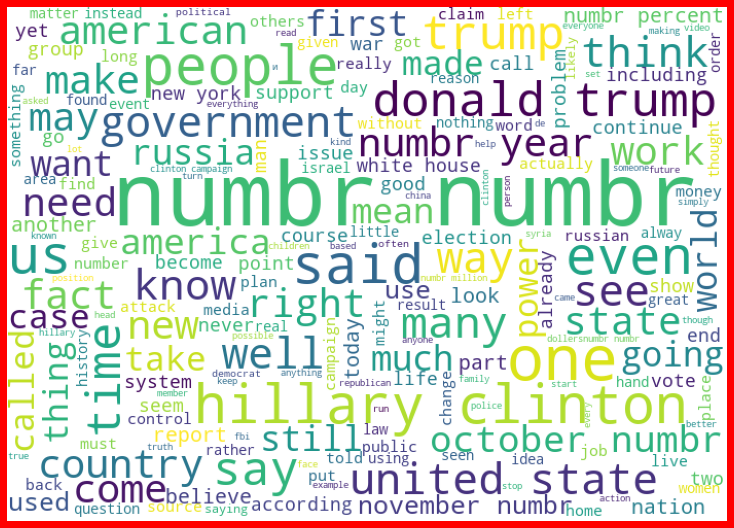

In [25]:
#Getting sense of loud words in Fake News - Articles
from wordcloud import WordCloud

fake = ds['news'][ds['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

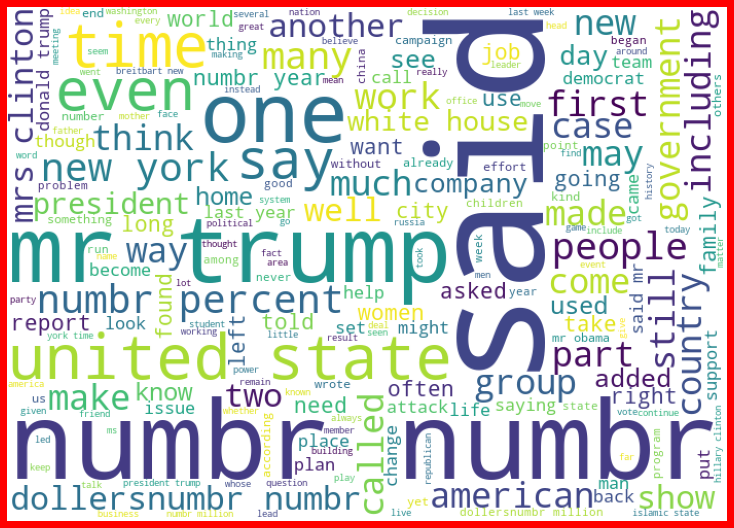

In [26]:
#Getting sense of loud words in Not Fake News - Articles
from wordcloud import WordCloud

not_fake = ds['news'][ds['label']==0]

not_fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(not_fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

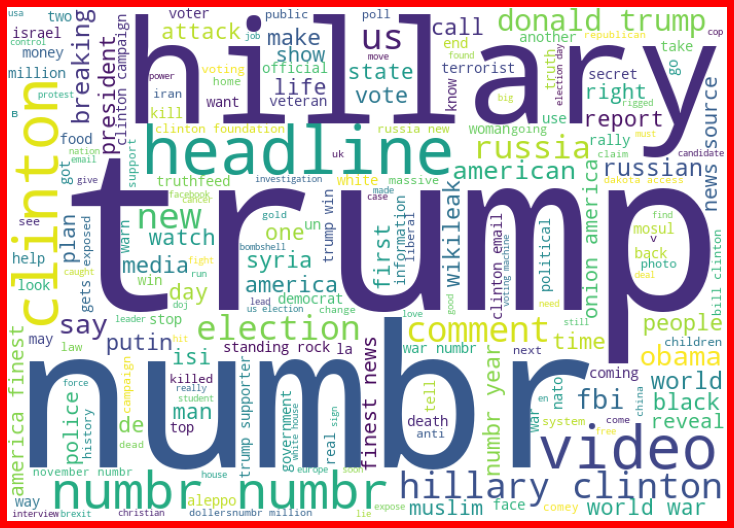

In [27]:
#Getting sense of loud words in Fake News - Headline
from wordcloud import WordCloud

fake = ds['headline'][ds['label']==1]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

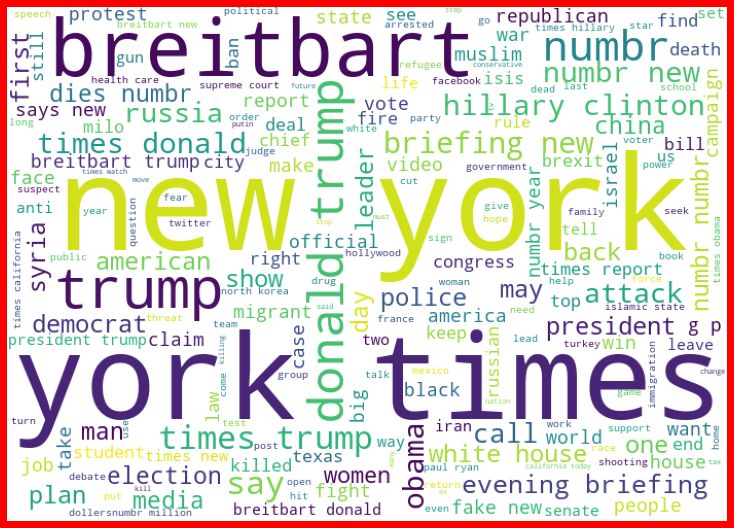

In [28]:
#Getting sense of loud words in Fake News - Headline
from wordcloud import WordCloud

fake = ds['headline'][ds['label']==0]

fake_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(fake))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fake_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [29]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(ds['written_by'] + ds['headline'] + ds['news'])

x = features
y = ds['label']
x.shape

(20761, 206471)

In [30]:
y.shape

(20761,)

In [31]:
# Libraries for training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Mmetrics to evaluate our model performance 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating instances

RF=RandomForestClassifier()
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier()
AD=AdaBoostClassifier()
XG=XGBClassifier()

In [32]:
# List of Models
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB()',MNB))
models.append(('DecisionTreeClassifier',DT))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [33]:
# Finding best Random State and then calculate Maximum Accuracy Score
def max_acc_score(clf,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** LogisticRegression *****************************


LogisticRegression()


Max Accuracy Score corresponding to Random State  93 is: 0.9555305827580671


Learning Score :  0.9774291219377924
Accuracy Score :  0.9555305827580671
Cross Val Score :  0.9914567942192318
roc auc score :  0.9555366806225251


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      3116
           1       0.94      0.97      0.96      3113

    accuracy                           0.96      6229
   macro avg       0.96      0.96      0.96      6229
weighted avg       0.96      0.96      0.96      6229



Confusion Matrix:
 [[2938  178]
 [  99 3014]]





*************************** MultinomialNB() *****************************


MultinomialNB()


Max Accuracy Score corresponding to Random State  52 is: 0.8582436988280623


Learning Score :  0.8996696944673823
Accuracy Score :  0.8582436988280623
Cross Val Score :  0

[14:53:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:41:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross Val Score :  0.9964866909571664
roc auc score :  0.9744758511967

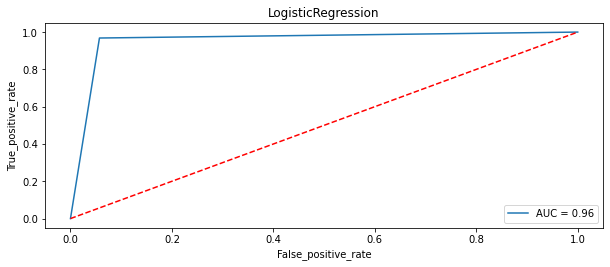

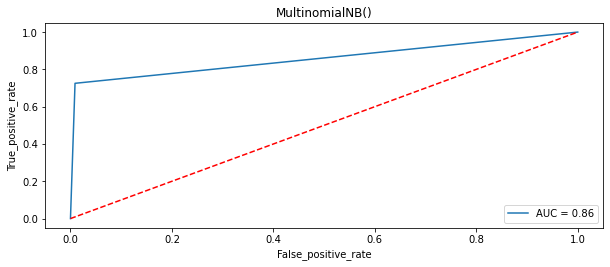

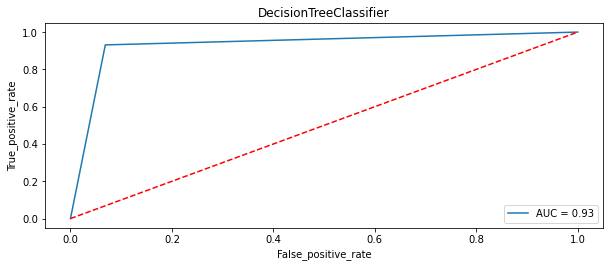

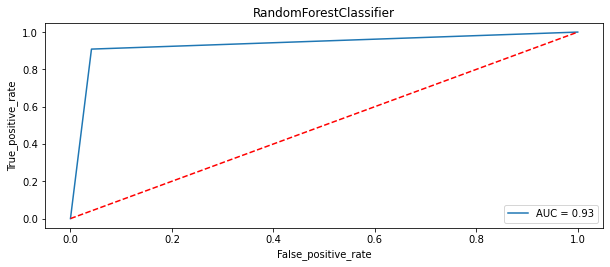

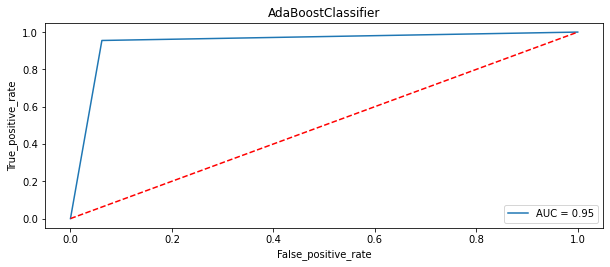

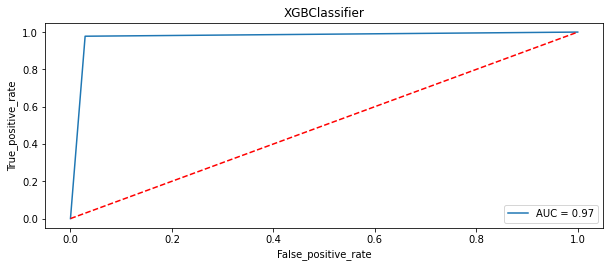

In [34]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='roc_auc').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
#................Classification Report...........................      
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    

    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [35]:
scores=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
scores.style.background_gradient()

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,LogisticRegression,97.742912,95.553058,99.145679,95.553668
1,MultinomialNB(),89.966969,85.824370,98.061520,85.817972
2,DecisionTreeClassifier,100.000000,93.128913,92.953467,93.128912
3,RandomForestClassifier,100.000000,93.369722,98.397533,93.368522
4,AdaBoostClassifier,94.488026,94.654038,98.628125,94.654446
5,XGBClassifier,99.931186,97.447423,99.648669,97.447585


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=98,test_size=.30,stratify=y)
XG=XGBClassifier()
XG.fit(x_train,y_train)
XG.score(x_train,y_train)
XGpred=XG.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,XGpred)) 
print('Confusion Matrix:\n',confusion_matrix(y_test,XGpred))
print('Classification Report:','\n',classification_report(y_test,XGpred))

[09:36:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.9693369722266817
Confusion Matrix:
 [[3006  110]
 [  81 3032]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      3116
           1       0.96      0.97      0.97      3113

    accuracy                           0.97      6229
   macro avg       0.97      0.97      0.97      6229
weighted avg       0.97      0.97      0.97      6229



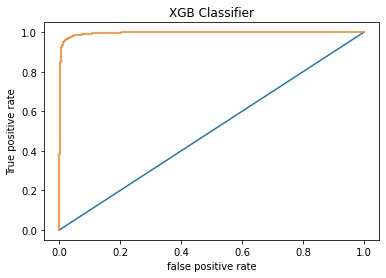

roc_auc_score =  0.9962726188203266


In [35]:
y_prob = XG.predict_proba(x_test)
y_prob = y_prob[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='XGB Classifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('XGB Classifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_prob))

In [36]:
test=pd.DataFrame(data=y_test,)
test['Predicted values']=XGpred

test.to_csv('Fake_news_Predict.csv')

test

,label,Predicted values
7342,1,1
2997,0,0
7882,1,1
13115,1,1
6538,1,1
...,...,...
7832,1,1
250,1,1
15308,0,0
15397,0,0


In [37]:
# Creating Pickle File
import joblib
joblib.dump(XG,'Fake_news_Predict.pkl')

['Fake_news_Predict.pkl']